# Objective:
Today’s focus is on understanding and mastering basic to intermediate data visualizations
using Matplotlib and Seaborn libraries. We'll explore concepts like distributions,
comparisons, and correlations using everyday data such as people’s age, income, job category, and more.

In [1]:
# 📊 Day 3: Visualizations with Matplotlib and Seaborn
# Author: David Caleb Chaparro Orozco
# Topic: Data Dummy and Data Visualization

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)
%matplotlib inline

## Dummy data creation
Let's simulate a real-world dataset: age, income, gender, and job category of 100 people

In [2]:
# For reproducibility
np.random.seed(42) 

# Create a dummy dataset

# Number of samples
n = 100
# Age between 18 and 65
ages = np.random.randint(18, 65, size=n)
# Incomes between ~3000
income = np.random.normal(loc=3000, scale=750, size=n).astype(int)
# Random gender assignment
gender = np.random.choice(["Male", "Female"], size=n)
# Random job category
job_category = np.random.choice(['Tech', 'Healthcare', 'Education', 'Retail'], size=n)

In [3]:
# Create a DataFrame
data = pd.DataFrame({
    'Age': ages,
    'Income': income,
    'Gender': gender,
    'Job Category': job_category
})
data.head()

,Age,Income,Gender,Job Category
0,56,3477,Female,Retail
1,46,2319,Female,Education
2,32,3357,Female,Retail
3,60,3977,Male,Education
4,25,3158,Female,Retail


# EDA (Exploratory Data Analisis)

## Age

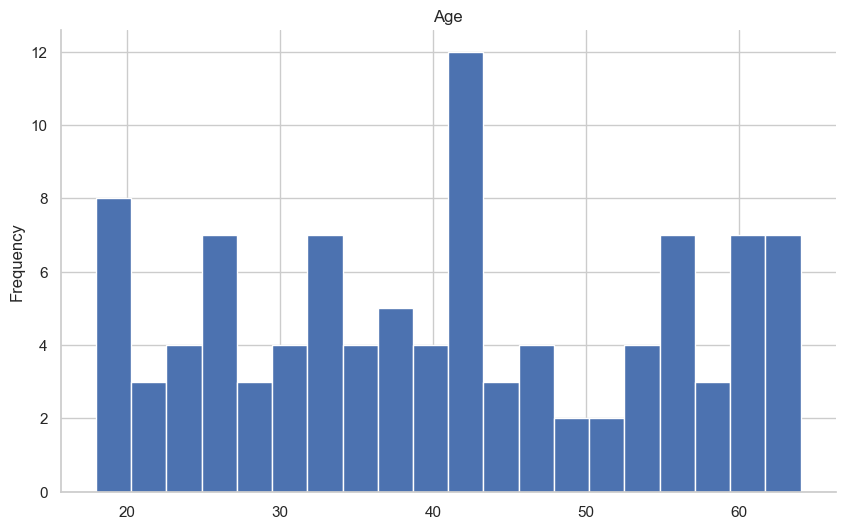

In [4]:
# Plot the distribution of age
data['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

## Income

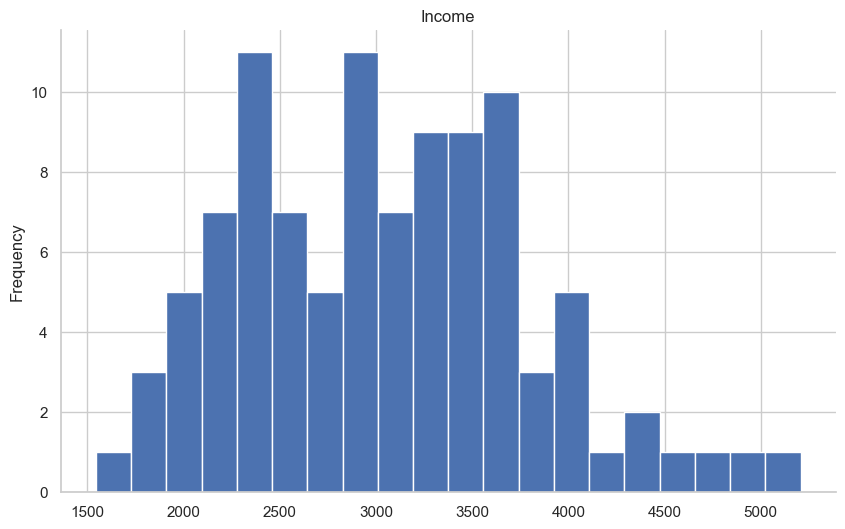

In [5]:
# Plot the distribution of income
data['Income'].plot(kind='hist', bins=20, title='Income')
plt.gca().spines[['top', 'right',]].set_visible(False)

## Job Category

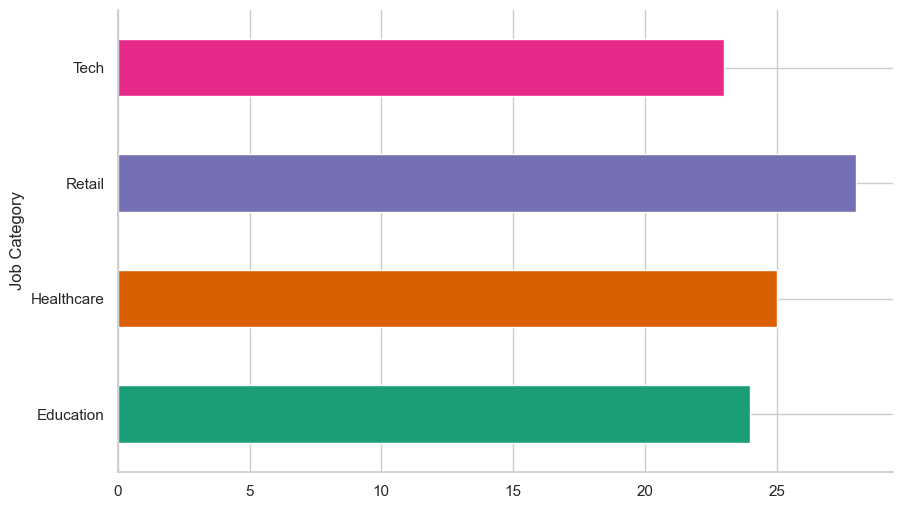

In [6]:
# Horizontal bar plot of job category counts
data.groupby('Job Category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

## Age vs Income

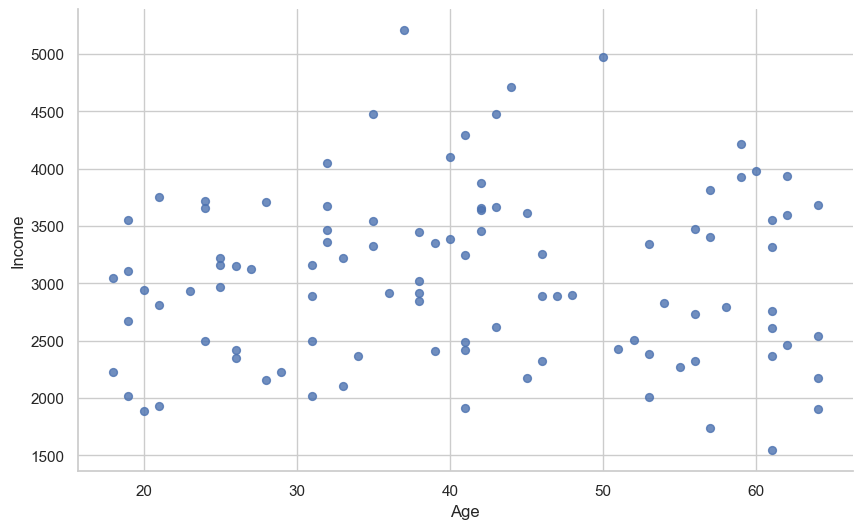

In [7]:
# Scatter plot showing relationship between age and income
data.plot(kind='scatter', x='Age', y='Income', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

## Job Category vs Income

C:\Users\Usuario\AppData\Local\Temp\ipykernel_30852\4155780097.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data, x='Age', y='Job Category', inner='stick', palette='Dark2')


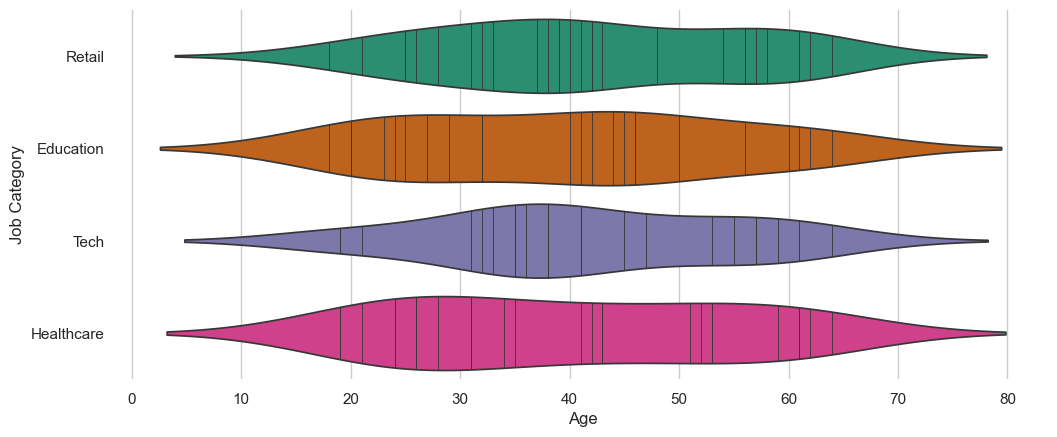

In [8]:
# Violin plot showing age spread across job categories
figsize = (12, 1.2 * len(data['Job Category'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='Age', y='Job Category', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

## Gender vs Job Category

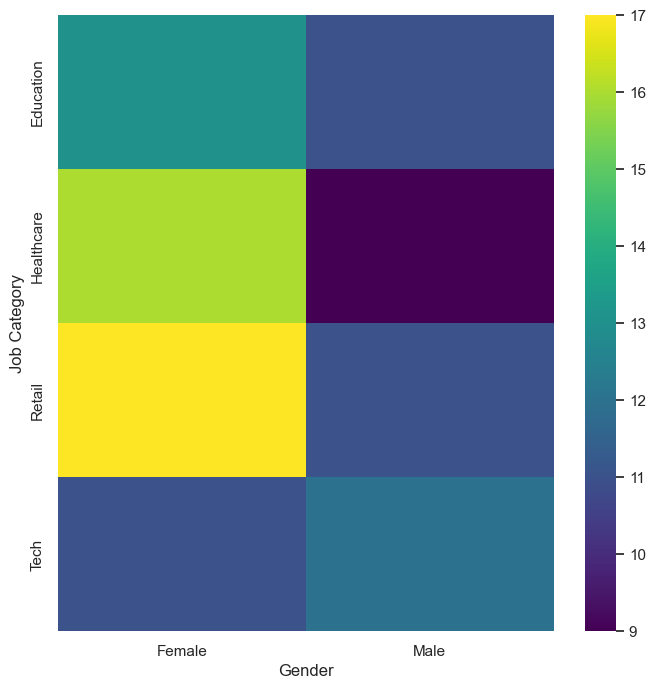

In [9]:
# Create a 2D histogram heatmap of gender and job category combinations

plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Job Category'].value_counts()
    for x_label, grp in data.groupby('Gender')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Gender')
_ = plt.ylabel('Job Category')

## Pairplot for basic feature relationships


Text(0.5, 1.02, 'Pairplot of Features Colored by Gender')

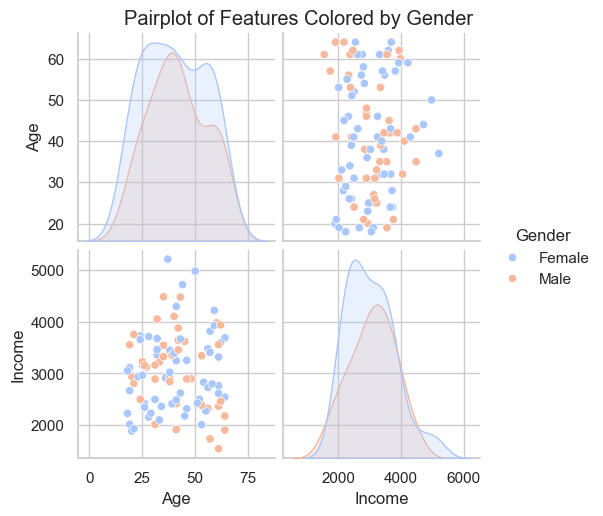

In [10]:
# This gives a quick overview of pairwise relationships and distributions in the dataset.
sns.pairplot(data, hue='Gender', palette='coolwarm', diag_kind='kde')
plt.suptitle("Pairplot of Features Colored by Gender", y=1.02)

## Boxplot: Income Distribution by Job Category

C:\Users\Usuario\AppData\Local\Temp\ipykernel_30852\2132291424.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Job Category', y='Income', palette='Set2')


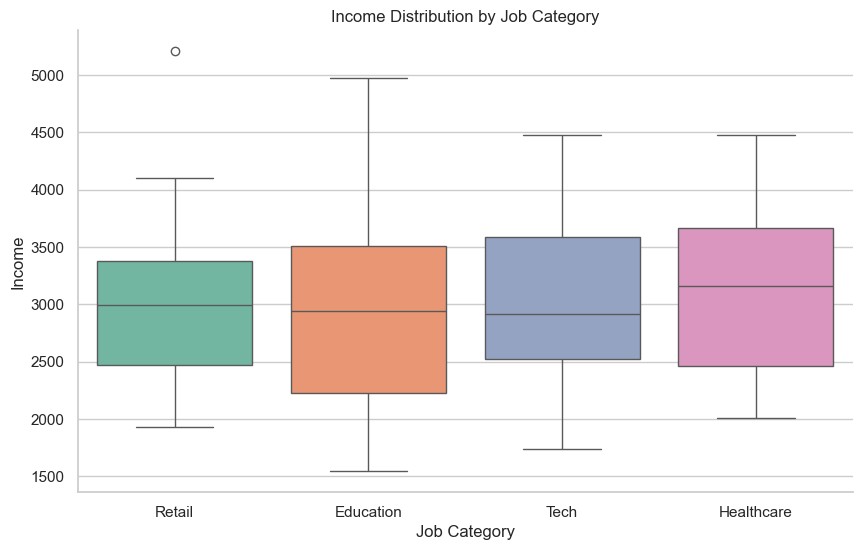

In [11]:
# Useful to detect outliers and compare income spread across different job categories.
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Job Category', y='Income', palette='Set2')
plt.title("Income Distribution by Job Category")
sns.despine()

## Age by Job Category

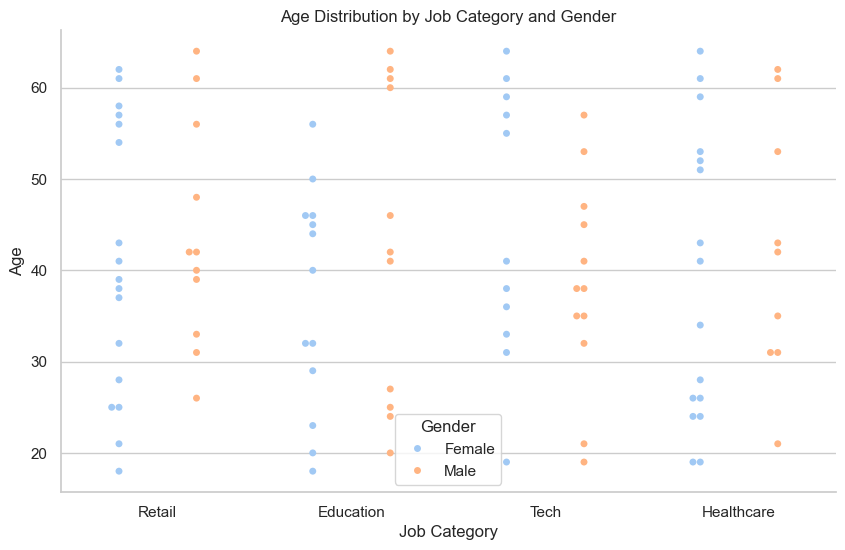

In [12]:

plt.figure(figsize=(10, 6))
sns.swarmplot(data=data, x='Job Category', y='Age', hue='Gender', palette='pastel', dodge=True)
plt.title("Age Distribution by Job Category and Gender")
sns.despine()

## Income distribution split by Gender

Text(0.5, 0.98, 'Income Distribution by Gender')

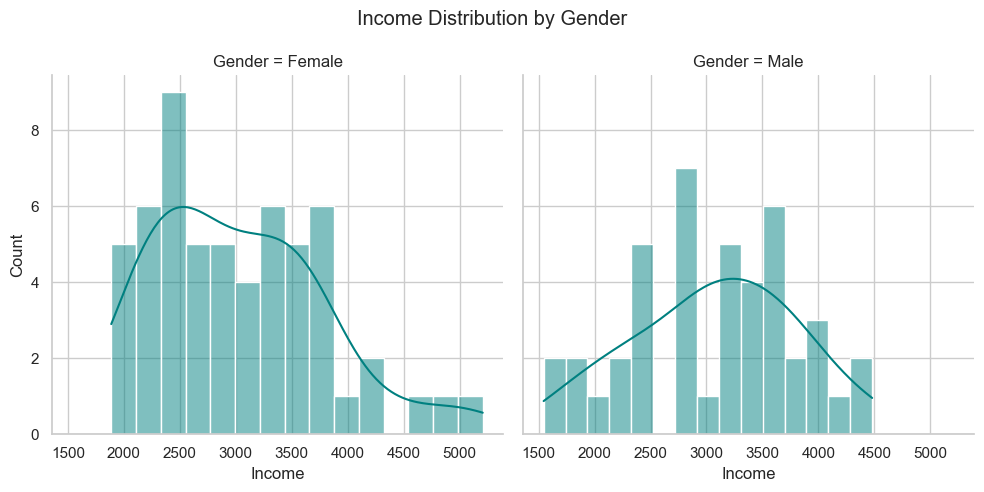

In [13]:
g = sns.FacetGrid(data, col="Gender", height=5)
g.map(sns.histplot, "Income", bins=15, kde=True, color='teal')
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle("Income Distribution by Gender")

## Gender distribution

C:\Users\Usuario\AppData\Local\Temp\ipykernel_30852\2853116812.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Gender', palette='Set1')


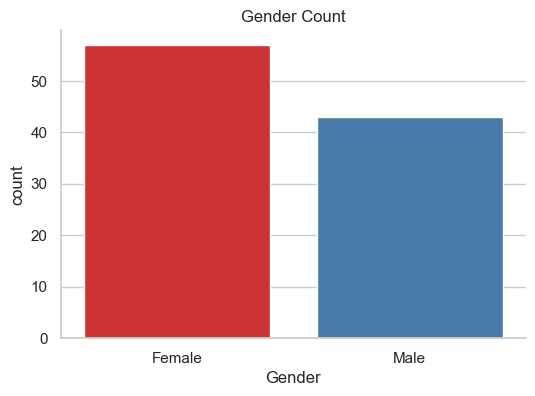

In [14]:
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Gender', palette='Set1')
plt.title("Gender Count")
sns.despine()

## Mean Income by Job Category

C:\Users\Usuario\AppData\Local\Temp\ipykernel_30852\559766269.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=data, x='Job Category', y='Income', estimator=np.mean, ci='sd', palette='Blues_d')
C:\Users\Usuario\AppData\Local\Temp\ipykernel_30852\559766269.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='Job Category', y='Income', estimator=np.mean, ci='sd', palette='Blues_d')


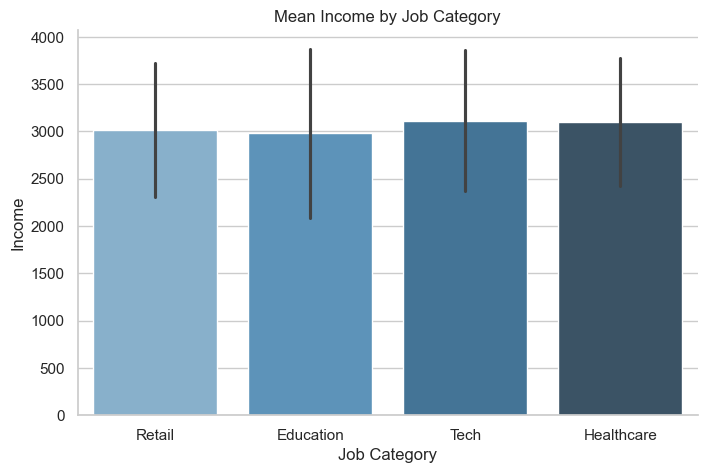

In [15]:
plt.figure(figsize=(8, 5))
sns.barplot(data=data, x='Job Category', y='Income', estimator=np.mean, ci='sd', palette='Blues_d')
plt.title("Mean Income by Job Category")
sns.despine()

## KDE Plot for Age and Income

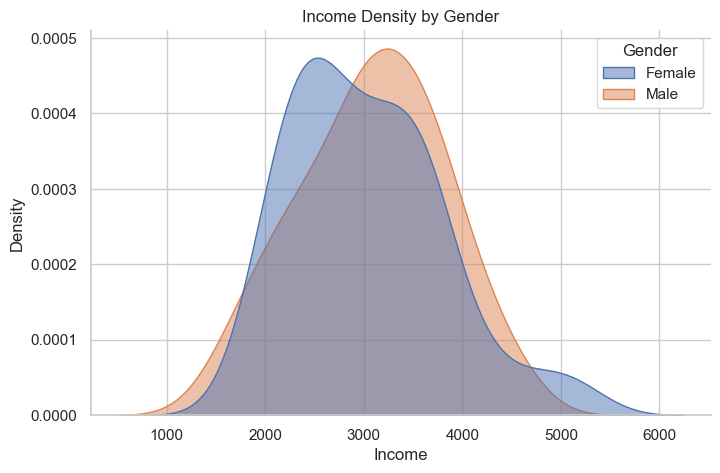

In [16]:
plt.figure(figsize=(8, 5))
sns.kdeplot(data=data, x='Income', hue='Gender', fill=True, common_norm=False, alpha=0.5)
plt.title("Income Density by Gender")
sns.despine()

## Jointplot with Regression

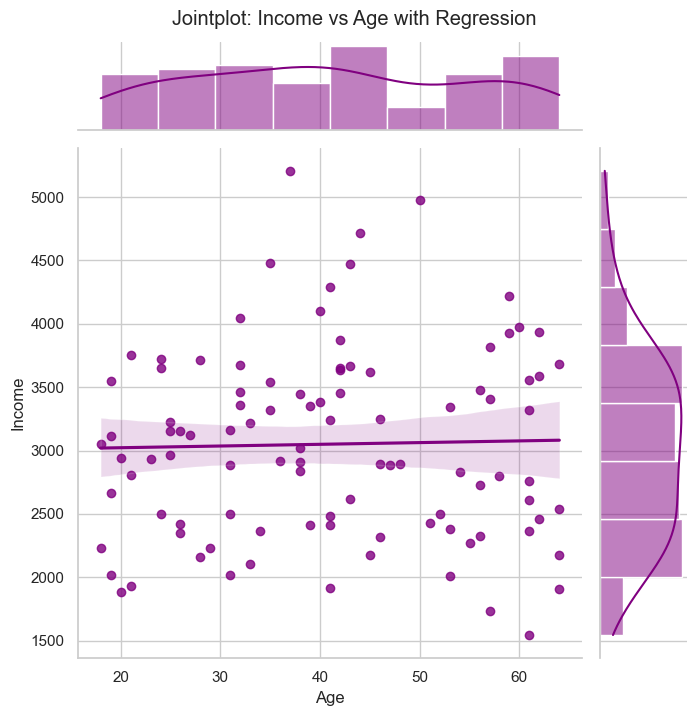

In [17]:
# Jointplot with Regression: Income vs Age
sns.jointplot(data=data, x='Age', y='Income', kind='reg', height=7, color='purple')
plt.suptitle("Jointplot: Income vs Age with Regression", y=1.02)
plt.show()


## Correlation Heatmap


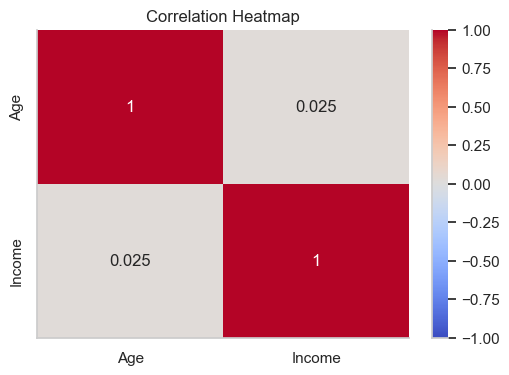

In [18]:
# Shows the correlation between numerical features such as Age and Income.
# Darker colors indicate stronger correlations.
plt.figure(figsize=(6, 4))
sns.heatmap(data[['Age', 'Income']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
sns.despine()

---

# EDA With `GridSpec`

**Personally, I prefer to structure the visualizations a bit differently, as it allows me to organize all the plots more clearly and makes it easier to reuse or extend the code with functions later on.**

**For example, in the version I’m sharing here, I used a `GridSpec` layout to arrange all the subplots in a clean, dashboard-like format. It also includes consistent styling and spacing, along with a centralized title and color palette. This approach can be more comfortable for some people when working with multiple charts in the same figure.**

**That said, everyone has their own workflow, and this is just one way to do it. In any case, I'm sharing it here in case it's helpful to others.**

C:\Users\Usuario\AppData\Local\Temp\ipykernel_30852\4004915663.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Job Category', data=data, palette='Dark2', ax=axes[2])
C:\Users\Usuario\AppData\Local\Temp\ipykernel_30852\4004915663.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='Age', y='Job Category', inner='stick', palette='Dark2', ax=axes[4])
C:\Users\Usuario\AppData\Local\Temp\ipykernel_30852\4004915663.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Job Category', y='Income', palette='Set2

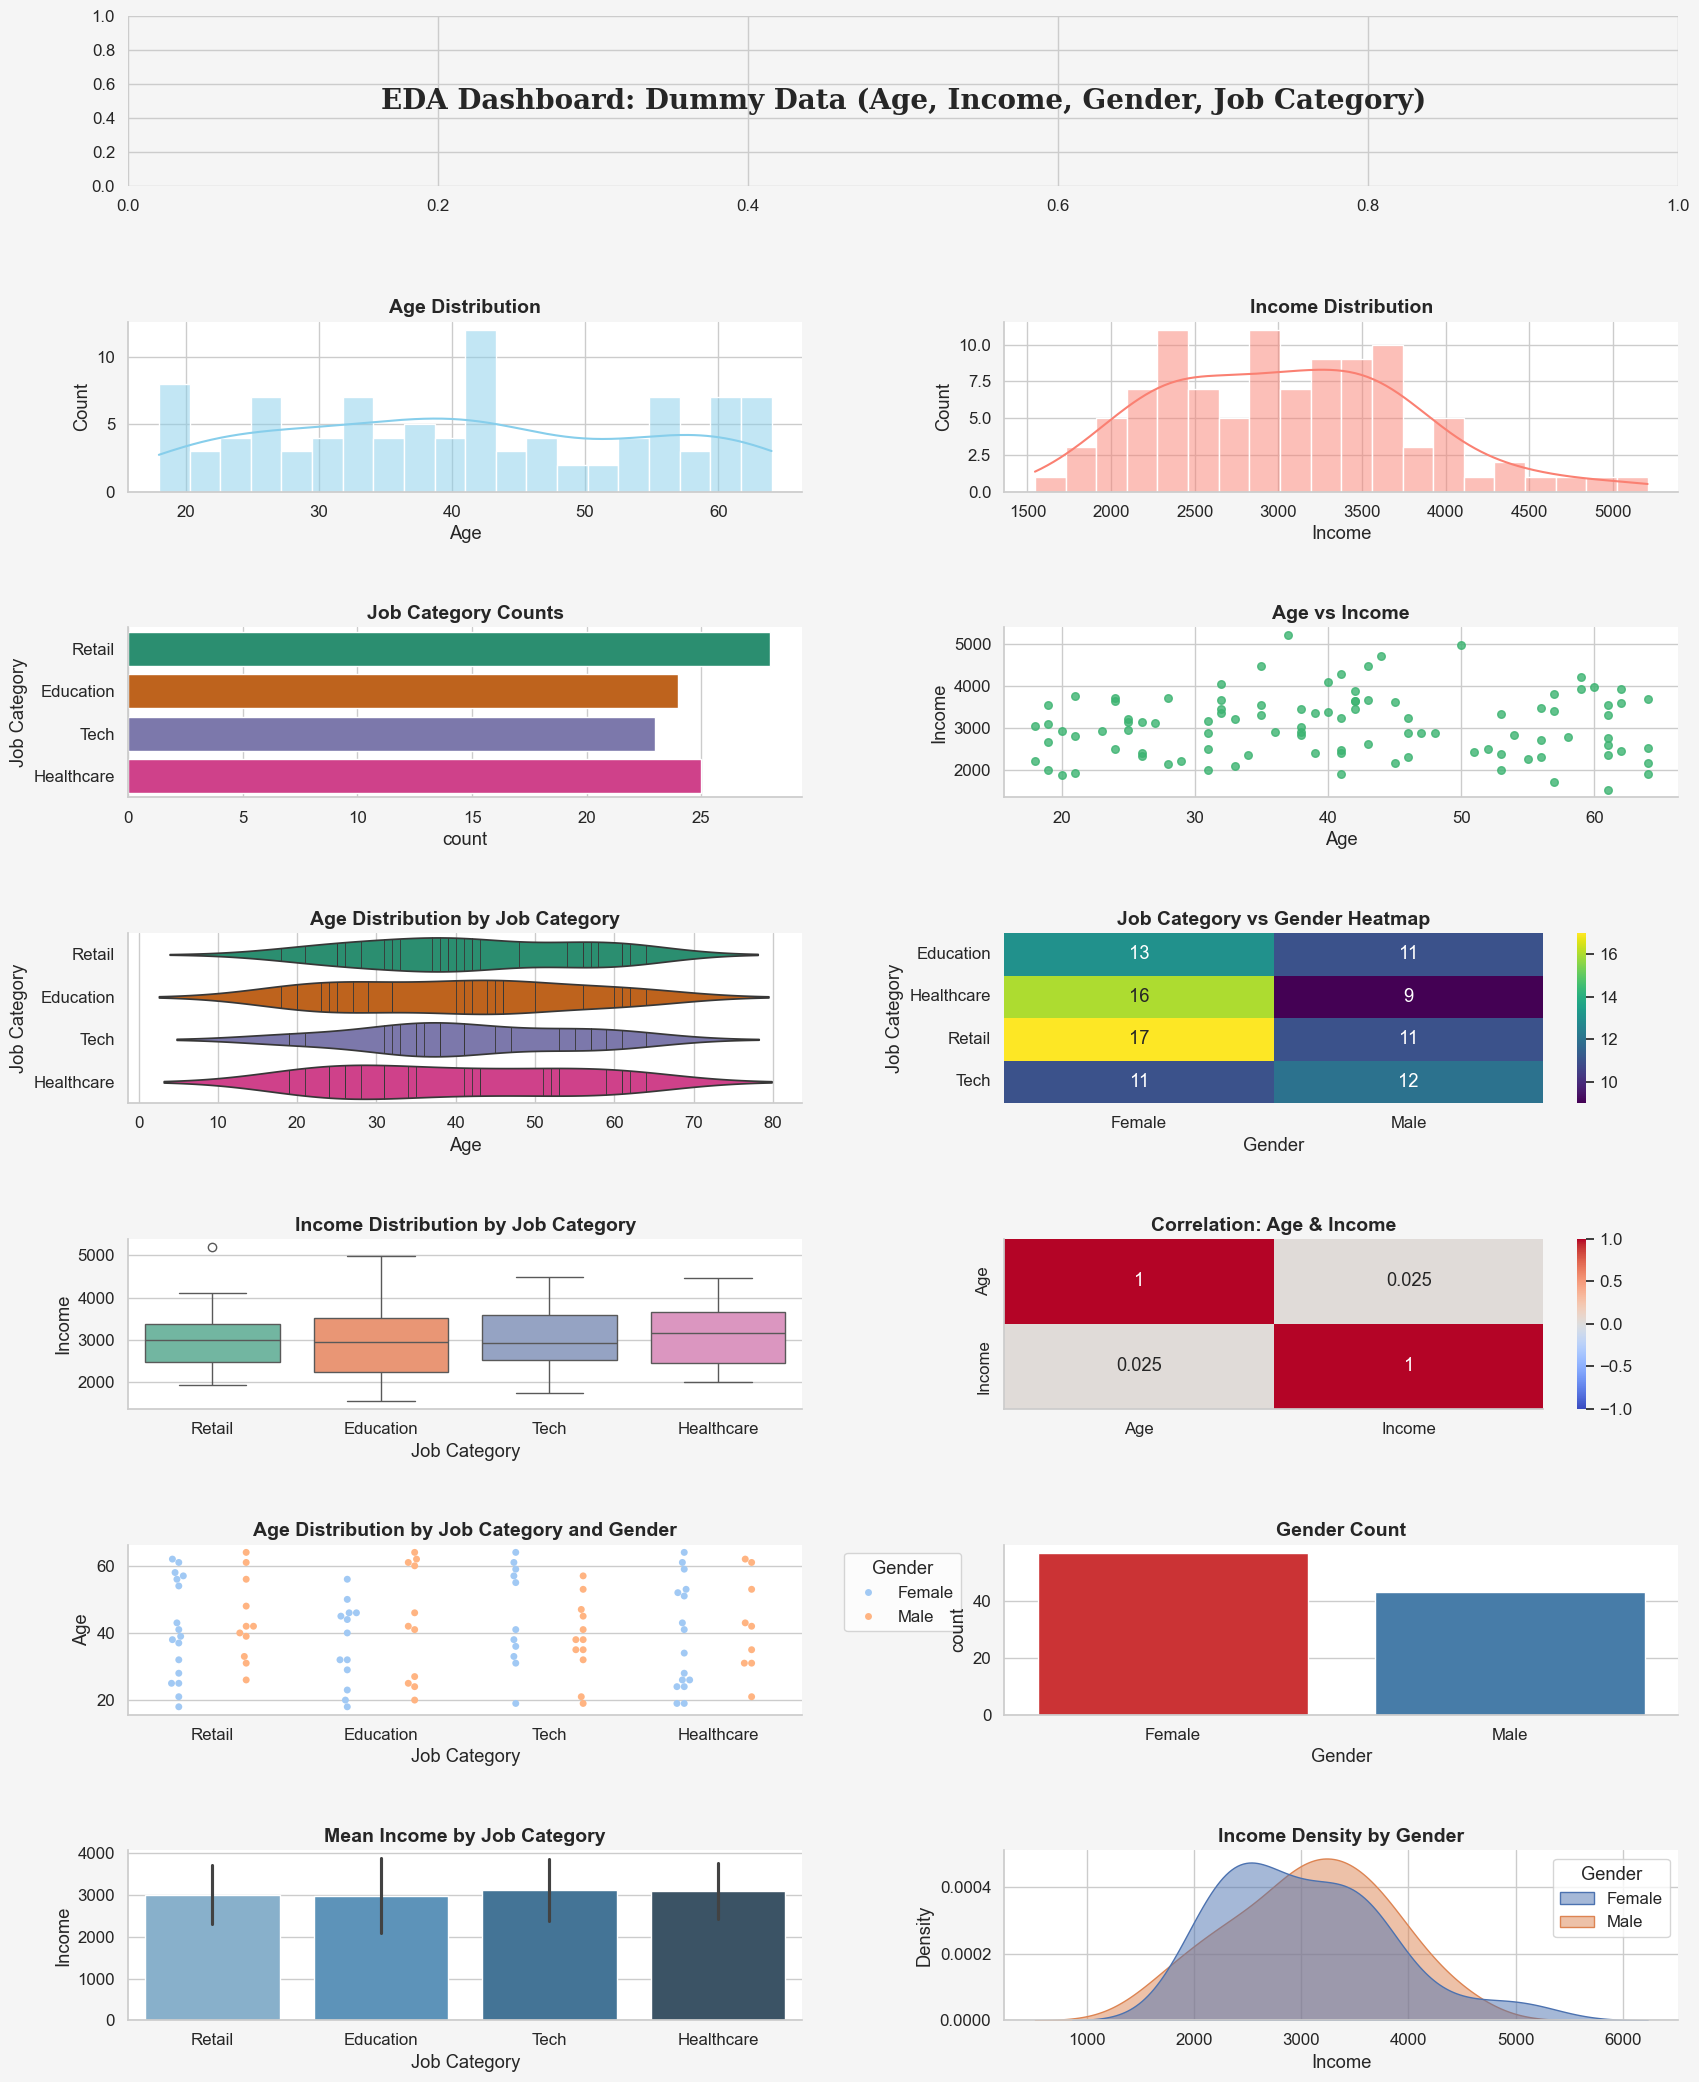

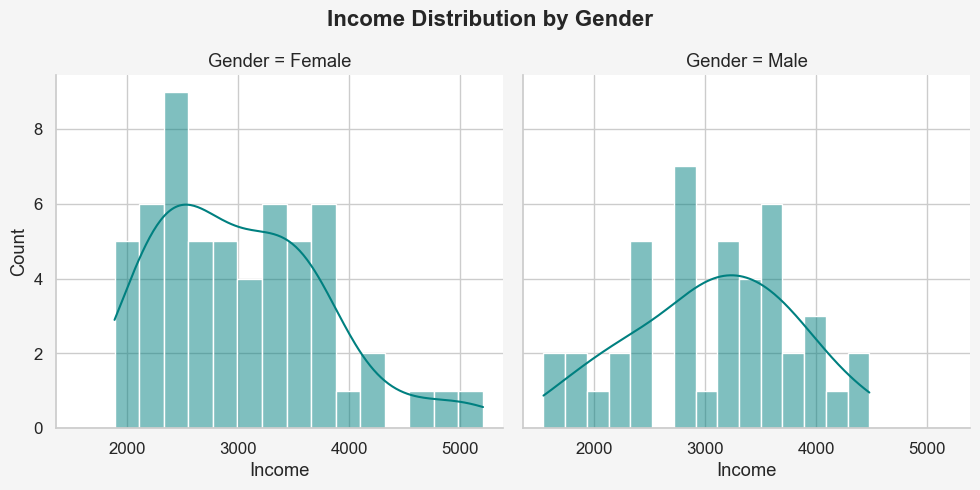

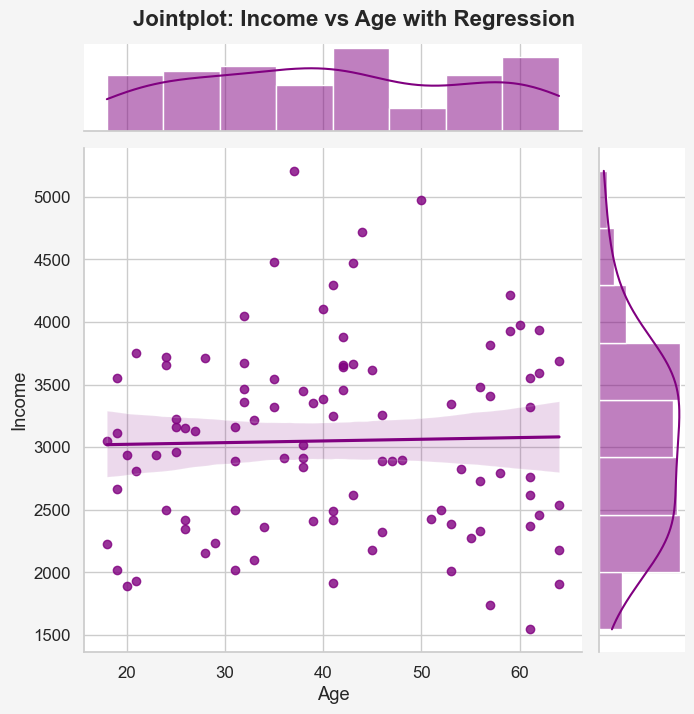

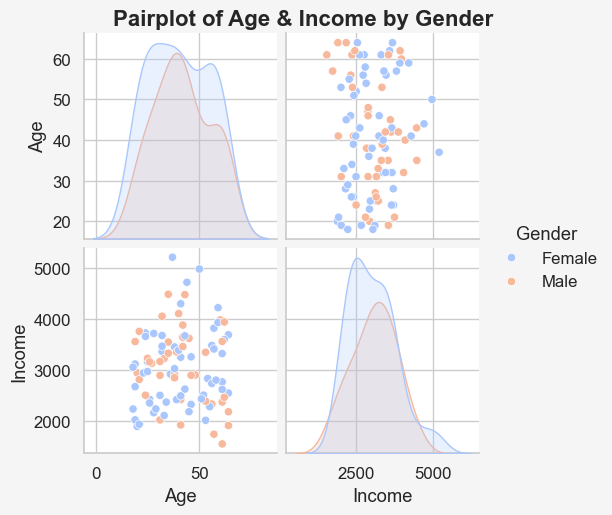

<Figure size 1000x600 with 0 Axes>

In [19]:
# Global style and figure aesthetics
background_color = "#f5f5f5"
sns.set(style="whitegrid", font_scale=1.1)
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams['figure.facecolor'] = background_color

# Layout
fig = plt.figure(figsize=(20, 30))
gs = fig.add_gridspec(8, 2)
gs.update(wspace=0.3, hspace=0.8)

# Title
title_ax = fig.add_subplot(gs[0, :])
title_ax.set_facecolor(background_color)
for spine in title_ax.spines.values():
    spine.set_visible(False)
title_ax.tick_params(left=False, bottom=False)
title_ax.text(0.5, 0.5,
                'EDA Dashboard: Dummy Data (Age, Income, Gender, Job Category)',
                horizontalalignment='center',
                verticalalignment='center',
                fontsize=20, fontweight='bold', fontfamily='serif')

# Axes assignment
axes = [
    # 1. Age distribution
    fig.add_subplot(gs[1, 0]),  
    # 2. Income distribution
    fig.add_subplot(gs[1, 1]),  
    # 3. Job Category counts
    fig.add_subplot(gs[2, 0]),  
    # 4. Age vs Income scatter
    fig.add_subplot(gs[2, 1]),  
    # 5. Violin plot
    fig.add_subplot(gs[3, 0]),  
    # 6. Heatmap: Job × Gender
    fig.add_subplot(gs[3, 1]),  
    # 7. Boxplot: Income by Job
    fig.add_subplot(gs[4, 0]),  
    # 8. Correlation heatmap
    fig.add_subplot(gs[4, 1]),  
    # 9. Swarmplot: Age by Job & Gender
    fig.add_subplot(gs[5, 0]),  
    # 10. Gender Countplot
    fig.add_subplot(gs[5, 1]),  
    # 11. Mean Income by Job
    fig.add_subplot(gs[6, 0]),  
    # 12. KDE Plot: Income by Gender
    fig.add_subplot(gs[6, 1]),  
    
]

# 1. Age distribution
sns.histplot(data['Age'], bins=20, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Age Distribution', fontsize=14, fontweight='bold')
axes[0].spines[['top', 'right']].set_visible(False)

# 2. Income distribution
sns.histplot(data['Income'], bins=20, kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Income Distribution', fontsize=14, fontweight='bold')
axes[1].spines[['top', 'right']].set_visible(False)

# 3. Job Category counts
sns.countplot(y='Job Category', data=data, palette='Dark2', ax=axes[2])
axes[2].set_title('Job Category Counts', fontsize=14, fontweight='bold')
axes[2].spines[['top', 'right']].set_visible(False)

# 4. Age vs Income scatter
axes[3].scatter(data['Age'], data['Income'], alpha=0.8, s=30, color='mediumseagreen')
axes[3].set_title('Age vs Income', fontsize=14, fontweight='bold')
axes[3].set_xlabel('Age')
axes[3].set_ylabel('Income')
axes[3].spines[['top', 'right']].set_visible(False)

# 5. Violin plot: Age by Job Category
sns.violinplot(data=data, x='Age', y='Job Category', inner='stick', palette='Dark2', ax=axes[4])
axes[4].set_title('Age Distribution by Job Category', fontsize=14, fontweight='bold')
sns.despine(ax=axes[4])

# 6. Heatmap: Job vs Gender
pivot = pd.crosstab(data['Job Category'], data['Gender'])
sns.heatmap(pivot, cmap='viridis', annot=True, fmt='d', ax=axes[5])
axes[5].set_title('Job Category vs Gender Heatmap', fontsize=14, fontweight='bold')

# 7. Boxplot: Income by Job Category
sns.boxplot(data=data, x='Job Category', y='Income', palette='Set2', ax=axes[6])
axes[6].set_title('Income Distribution by Job Category', fontsize=14, fontweight='bold')
sns.despine(ax=axes[6])

# 8. Correlation heatmap
corr = data[['Age', 'Income']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=axes[7])
axes[7].set_title('Correlation: Age & Income', fontsize=14, fontweight='bold')
sns.despine(ax=axes[7])

# 9. Swarmplot: Age by Job & Gender
sns.swarmplot(data=data, x='Job Category', y='Age', hue='Gender',
                palette='pastel', dodge=True, ax=axes[8])
axes[8].set_title('Age Distribution by Job Category and Gender', fontsize=14, fontweight='bold')
sns.despine(ax=axes[8])
axes[8].legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')

# 10. Gender Countplot
sns.countplot(data=data, x='Gender', palette='Set1', ax=axes[9])
axes[9].set_title("Gender Count", fontsize=14, fontweight='bold')
sns.despine(ax=axes[9])

# 11. Mean Income by Job Category
sns.barplot(data=data, x='Job Category', y='Income',
            estimator=np.mean, ci='sd', palette='Blues_d', ax=axes[10])
axes[10].set_title("Mean Income by Job Category", fontsize=14, fontweight='bold')
sns.despine(ax=axes[10])

# 12. KDE Plot: Income by Gender
sns.kdeplot(data=data, x='Income', hue='Gender', fill=True,
            common_norm=False, alpha=0.5, ax=axes[11])
axes[11].set_title("Income Density by Gender", fontsize=14, fontweight='bold')
sns.despine(ax=axes[11])

# 13. FacetGrid: Income Distribution by Gender
g = sns.FacetGrid(data, col="Gender", height=5)
g.map(sns.histplot, "Income", bins=15, kde=True, color='teal')
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle("Income Distribution by Gender", fontsize=16, fontweight='bold')
plt.show()

# 14. Jointplot: Income vs Age with Regression
sns.jointplot(data=data, x='Age', y='Income', kind='reg', height=7, color='purple')
plt.suptitle("Jointplot: Income vs Age with Regression", y=1.02, fontsize=16, fontweight='bold')
plt.show()

# 15. Pairplot
sns.pairplot(data[['Age', 'Income', 'Gender']], hue='Gender', palette='coolwarm')
plt.suptitle("Pairplot of Age & Income by Gender", y=1.02, fontsize=16, fontweight='bold')
plt.show()

# Final layout
plt.tight_layout()
plt.show()

---

In [20]:
from visualization_utils import (
    plot_histogram, plot_violin, plot_boxplot, plot_swarm,
    plot_jointplot, plot_heatmap_category_combinations,
    plot_kde, plot_bar_mean_by_category, plot_radar_chart_by_category_means
)

In [21]:
# Plot 1: Histogram of Age
plot_histogram(data, 'Age', color='teal')

# Plot 2: Violin plot (Income by Gender)
plot_violin(data, x='Gender', y='Income', palette='muted')

# Plot 3: Boxplot (Age by Job Category)
plot_boxplot(data, x='Job Category', y='Age', palette='pastel')

# Plot 4: Swarm plot (Age by Job Category, colored by Gender)
plot_swarm(data, x='Job Category', y='Age', hue='Gender', palette='Set1')

# Plot 5: KDE plot (Income by Gender)
plot_kde(data, x='Income', hue='Gender')

# Plot 6: Correlation heatmap between Gender and Job Category
plot_heatmap_category_combinations(data, 'Gender', 'Job Category')

# Plot 7: Bar plot of average Income by Job Category
plot_bar_mean_by_category(data, 'Job Category', 'Income')

# Plot 8: Jointplot (Income vs Age)
plot_jointplot(data, x='Age', y='Income', color='purple')

# Plot 9: Radar Chart (Normalized Means by Job Category)
numeric_vars = ['Age', 'Income']
plot_radar_chart_by_category_means(data, 'Job Category', numeric_vars)

c:\Users\Usuario\Desktop\100DaysofDataMastery\Day3_Data_Visualizations\visualization_utils.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x=x, y=y, **kwargs)
c:\Users\Usuario\Desktop\100DaysofDataMastery\Day3_Data_Visualizations\visualization_utils.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x=x, y=y, **kwargs)


In [22]:
data['Years Experience'] = np.random.randint(1, 20, size=n) + (data['Age'] - 18) // 4
plot_radar_chart_by_category_means(data, 'Job Category', 
                                    ['Age', 'Income', 'Years Experience'],
                                    filename='radar_chart_extended.png')